# Skincare Recommendation System

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 

from sklearn.metrics.pairwise import cosine_similarity

from bokeh.io import show, curdoc, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, Select, Paragraph, TextInput
from bokeh.layouts import widgetbox, column, row
from ipywidgets import interact


from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 

import markovify
import string

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

import warnings; warnings.simplefilter('ignore')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [2]:
from sklearn.metrics import classification_report

In [3]:
df1 = pd.read_csv('skindataall1.csv', index_col=[0])

In [8]:
df1.shape

(8649, 25)

In [4]:
df1.head()

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product,Brand,Price,...,Oily,Sensitive,Category,Product_Url,User_id,Product_id,Ingredients_Cleaned,Review_Cleaned,Good_Stuff,Ing_Tfidf
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,3420,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['hand', 'best', 'cleanser', 'ever', 'used', '...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2483,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['unfortunately', 'work', 'everyone', 'used', ...",0,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
2,Sabi1991,NaN,NaN,NaN,NaN,5,My favorite cleanser!! i love the packaging on...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2715,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['favorite', 'cleanser', 'love', 'packaging', ...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,4497,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['love', 'thing', 'youth', 'people', 'cleanser...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,5017,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['trial', 'size', 'wa', 'obsessed', 'skin', 'f...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."


In [9]:
df = df1.dropna()

In [10]:
df

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product,Brand,Price,...,Oily,Sensitive,Category,Product_Url,User_id,Product_id,Ingredients_Cleaned,Review_Cleaned,Good_Stuff,Ing_Tfidf
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,3420,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['hand', 'best', 'cleanser', 'ever', 'used', '...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2483,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['unfortunately', 'work', 'everyone', 'used', ...",0,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,4497,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['love', 'thing', 'youth', 'people', 'cleanser...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,5017,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['trial', 'size', 'wa', 'obsessed', 'skin', 'f...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
6,britcorm,Porcelain,Oily,Blue,Brunette,1,Been trying this cleanser for about 3 weeks no...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,3776,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['trying', 'cleanser', 'week', 'glad', 'bought...",0,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8696,dalia83,Light,Combination,Green,Blonde,5,I had lunch with a friend who is a plastic sur...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,88,...,1,1,Moisturizer,https://www.sephora.com/product/ferulic-retino...,4056,124,"['dicaprylyl', 'carbonate', 'niacinamide', 'ce...","['lunch', 'friend', 'plastic', 'surgeon', 'tol...",1,"dicaprylyl, carbonate, niacinamide, cetyl, alc..."
8697,rebeccaelizabe,Porcelain,Oily,Blue,Auburn,5,I've been using this for about a week now (wit...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,88,...,1,1,Moisturizer,https://www.sephora.com/product/ferulic-retino...,6111,124,"['dicaprylyl', 'carbonate', 'niacinamide', 'ce...","['using', 'week', 'facial', 'cleanser', 'daily...",1,"dicaprylyl, carbonate, niacinamide, cetyl, alc..."
8698,Tinkfairy,Fair,Combination,Hazel,Brunette,5,I was looking for a overnight serum with retin...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,88,...,1,1,Moisturizer,https://www.sephora.com/product/ferulic-retino...,3127,124,"['dicaprylyl', 'carbonate', 'niacinamide', 'ce...","['wa', 'looking', 'overnight', 'serum', 'retin...",1,"dicaprylyl, carbonate, niacinamide, cetyl, alc..."
8699,baeyonce,Light,Combination,Blue,Blonde,5,I have never experienced such fast results in ...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,88,...,1,1,Moisturizer,https://www.sephora.com/product/ferulic-retino...,3616,124,"['dicaprylyl', 'carbonate', 'niacinamide', 'ce...","['never', 'experienced', 'fast', 'result', 'li...",1,"dicaprylyl, carbonate, niacinamide, cetyl, alc..."


# EDA and Data Visualizations

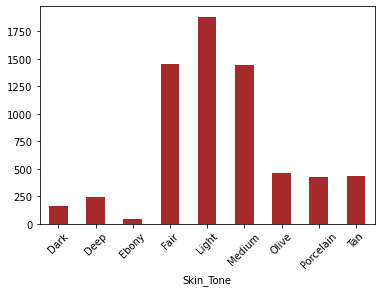

In [11]:
skintone_stats = df.groupby('Skin_Tone')['Username'].count()
skintone_stats.plot.bar(color = 'brown', rot=45)

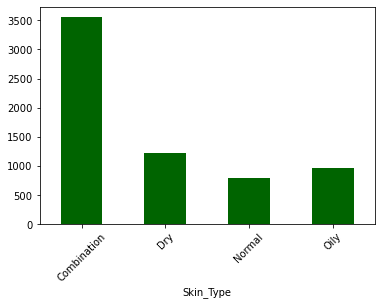

In [12]:
skintype_stats = df.groupby('Skin_Type')['Username'].count()
skintype_stats.plot.bar(color = 'darkgreen', rot=45)

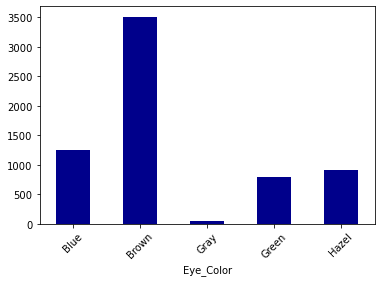

In [13]:
eyecolor_stats = df.groupby('Eye_Color')['Username'].count()
eyecolor_stats.plot.bar(color = 'darkblue', rot=45)

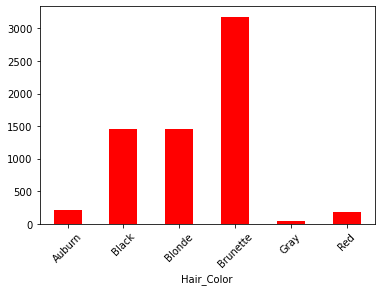

In [14]:
haircolor_stats = df.groupby('Hair_Color')['Username'].count()
haircolor_stats.plot.bar(color = 'red', rot=45)

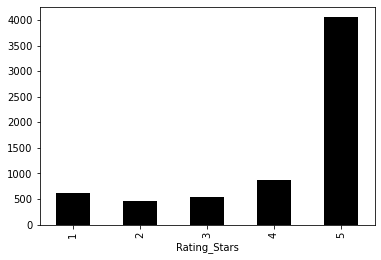

In [15]:
rating_stats = df.groupby('Rating_Stars')['Username'].count()
rating_stats.plot.bar(color = 'black')

# Markov Chain neural net for language generator

In [16]:
import markovify
import string

In [17]:
def no_punct(string):
    no_punct_string = re.sub(r'[^\w\s]', '', string)
    return no_punct_string

In [18]:
df['Review'] = df.apply(lambda row: no_punct(row['Review']), axis=1)

In [19]:
text_model = markovify.NewlineText(df.Review, state_size = 2)

In [21]:
for i in range(3):
    print(text_model.make_sentence())

Ive bought every brand of wipes known to man Randomly had a lot of makeup They are the absolute softest product on a micro mist The glass bottle to be up close to the effects are worth it
Great eye makeup I use the tacha water cream before moisturizing am and by morning my skin for about 3 weeks It is very sensitive skin that is so silky smooth I follow up with a little goes a long search for a fraction of this on with few expectations and Im as oily and sensitive No improvement just irritation
Hey guys I think its giving me some Susan so I bought this product Had previously used the whole face is always protected


# NLP: wordclouds and classification

In [22]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [23]:
negative_df = df[df.Rating_Stars <= 4]
positive_df = df[df.Rating_Stars > 4]
negative = " ".join(review for review in negative_df.Review)
positive = " ".join(review for review in positive_df.Review)

In [24]:
stopwords = set(STOPWORDS)
stopwords.update(['read', 'more', 'product'])

In [25]:
def generate_wordcloud(data):
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(data)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

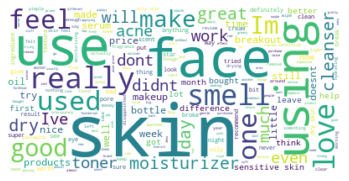

In [26]:
generate_wordcloud(negative)

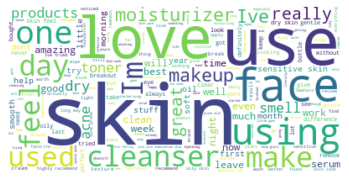

In [27]:
generate_wordcloud(positive)

If you carefully look at the wordcloud of the negative reviews, you can see that a lot of people complain about the smell of the skincare product!

In [28]:
moist_df = df[df.Category == 'Moisturizer']
cleanse_df = df[df.Category == 'Cleanser']
mask_df = df[df.Category == 'Face Mask']
treat_df = df[df.Category == 'Treatment']

In [29]:
moist = " ".join(ing for ing in moist_df.Ingredients)
cleanse = " ".join(ing for ing in cleanse_df.Ingredients)
mask = " ".join(ing for ing in mask_df.Ingredients)
treat = " ".join(ing for ing in treat_df.Ingredients)

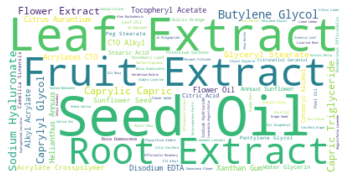

In [30]:
generate_wordcloud(moist)

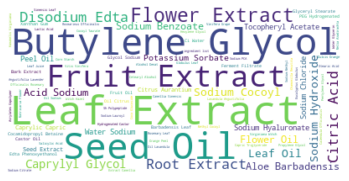

In [31]:
generate_wordcloud(cleanse)

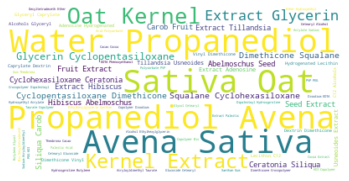

In [32]:
generate_wordcloud(mask)

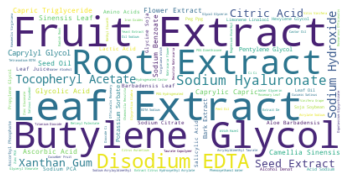

In [33]:
generate_wordcloud(treat)

In [34]:
X = df.Ingredients
y = df.Category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [35]:
categories = ['Moisturizer', 'Cleanser', 'Face Mask', 'Treatment']

In [36]:
#Naive Bayes
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=categories))

accuracy 0.9712186160440907
              precision    recall  f1-score   support

 Moisturizer       0.97      1.00      0.98       813
    Cleanser       0.00      0.00      0.00         6
   Face Mask       0.98      0.97      0.98       457
   Treatment       0.96      0.93      0.94       357

    accuracy                           0.97      1633
   macro avg       0.73      0.72      0.73      1633
weighted avg       0.97      0.97      0.97      1633



In [37]:
#Logistic Regression
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=categories))

accuracy 0.9865278628291488
              precision    recall  f1-score   support

 Moisturizer       0.99      0.98      0.99       813
    Cleanser       1.00      1.00      1.00         6
   Face Mask       0.97      1.00      0.98       457
   Treatment       1.00      0.98      0.99       357

    accuracy                           0.99      1633
   macro avg       0.99      0.99      0.99      1633
weighted avg       0.99      0.99      0.99      1633



In [38]:
#SVG with SGD
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=categories))

accuracy 0.9865278628291488
              precision    recall  f1-score   support

 Moisturizer       0.99      0.98      0.99       813
    Cleanser       1.00      1.00      1.00         6
   Face Mask       0.97      1.00      0.98       457
   Treatment       1.00      0.98      0.99       357

    accuracy                           0.99      1633
   macro avg       0.99      0.99      0.99      1633
weighted avg       0.99      0.99      0.99      1633



## Quality and effectiveness check



In [39]:
X1 = df.Ingredients
y1 = df.Good_Stuff
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state = 42)

In [40]:
cat = ['1', '0']

In [41]:
#Naive Bayes
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train1, y_train1)

y_pred1 = nb.predict(X_test1)

print('accuracy %s' % accuracy_score(y_pred1, y_test1))
print(classification_report(y_test1, y_pred1, target_names=cat))

accuracy 0.6191059399877527
              precision    recall  f1-score   support

           1       0.45      0.23      0.30       592
           0       0.66      0.84      0.74      1041

    accuracy                           0.62      1633
   macro avg       0.55      0.53      0.52      1633
weighted avg       0.58      0.62      0.58      1633



In [42]:
#Logistic Regression
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train1, y_train1)


y_pred1 = logreg.predict(X_test1)

print('accuracy %s' % accuracy_score(y_pred1, y_test1))
print(classification_report(y_test1, y_pred1, target_names=cat))

accuracy 0.6289038579301899
              precision    recall  f1-score   support

           1       0.48      0.27      0.34       592
           0       0.67      0.84      0.74      1041

    accuracy                           0.63      1633
   macro avg       0.57      0.55      0.54      1633
weighted avg       0.60      0.63      0.60      1633



In [43]:
#SVG with SGD
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train1, y_train1)

y_pred1 = sgd.predict(X_test1)

print('accuracy %s' % accuracy_score(y_pred1, y_test1))
print(classification_report(y_test1, y_pred1, target_names=cat))

accuracy 0.6429883649724434
              precision    recall  f1-score   support

           1       0.60      0.04      0.08       592
           0       0.64      0.98      0.78      1041

    accuracy                           0.64      1633
   macro avg       0.62      0.51      0.43      1633
weighted avg       0.63      0.64      0.53      1633



In [46]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import cross_validate 
from surprise.model_selection import train_test_split as tts
from surprise.model_selection import RandomizedSearchCV

In [47]:
data = df[['User_id', 'Product_id', 'Rating']]
reader = Reader(line_format='user item rating', sep=',')
data = Dataset.load_from_df(data, reader=reader)

trainset, testset = tts(data, test_size=.2)

In [48]:
svd = SVD()
svd.fit(trainset)

In [49]:
predictions = svd.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 0.1436
MAE:  0.0836


0.08357121782523672

## Recommender that uses the customer features only to recommend the products

In [44]:
def recommend_products_by_user_features(skintone, skintype, eyecolor, haircolor, percentile=0.85):
    ddf = df[(df['Skin_Tone'] == skintone) & (df['Hair_Color'] == haircolor) & (df['Skin_Type'] == skintype) & (df['Eye_Color'] == eyecolor)]
    
    recommendations = ddf[(ddf['Rating_Stars'].notnull())][['Rating_Stars', 'Product_Url', 'Product']]
    recommendations = recommendations.sort_values('Rating_Stars', ascending=False).head(10)
    
    print('Based on your features, these are the top products for you:')
    return recommendations

In [45]:
recommend_products_by_user_features('Light', 'Combination', 'Green', 'Brunette')

Based on your features, these are the top products for you:


,Rating_Stars,Product_Url,Product
349,5,https://www.sephora.com/product/bi-facil-doubl...,Bi-Facil Double-Action Eye Makeup Remover
1977,5,https://www.sephora.com/product/ultimate-mirac...,Ultimate Miracle Worker Multi-Rejuvenating Cre...
2800,5,https://www.sephora.com/product/aqua-bomb-slee...,Aqua Bomb Sleeping Mask
2918,5,https://www.sephora.com/product/vitamin-c-anti...,Vitamin Nectar Antioxidant Face Mist
2944,5,https://www.sephora.com/product/peat-miracle-r...,Peat Miracle Revital Cream
2998,5,https://www.sephora.com/product/gold-camellia-...,Gold Camellia Beauty Oil
350,5,https://www.sephora.com/product/bi-facil-doubl...,Bi-Facil Double-Action Eye Makeup Remover
3525,5,https://www.sephora.com/product/the-cleansing-...,The Cleansing Foam
3999,5,https://www.sephora.com/product/clean-bee-ultr...,Clean Bee Ultra Gentle Facial Cleanser
4069,5,https://www.sephora.com/product/time-release-a...,Time Release Acne Cleanser


In [ ]:
## Collaborative filtering with Lightfm

In [51]:
from scipy import sparse
from lightfm import LightFM
from sklearn.metrics.pairwise import cosine_similarity
from lightfm.evaluation import auc_score
from lightfm.evaluation import precision_at_k,recall_at_k

In [52]:
def create_interaction_matrix(df, user_col, item_col, rating_col, norm= False, threshold = None):
    interactions = df.groupby([user_col, item_col])[rating_col].sum().unstack().reset_index().fillna(0).set_index(user_col)
    if norm:
        interactions = interactions.applymap(lambda x: 1 if x > threshold else 0)
    return interactions

In [53]:
interaction_matrix = create_interaction_matrix(df=df, user_col='User_id', item_col = 'Product_id', rating_col='Rating_Stars')
interaction_matrix.head()

Product_id,0,1,2,3,4,5,6,7,8,9,...,305,306,307,308,309,310,311,312,313,314
User_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
def runMF(interactions, n_components=30, loss='warp', k=15, epoch=30,n_jobs = 4):
    x = sparse.csr_matrix(interactions.values)
    model = LightFM(no_components= n_components, loss=loss,k=k)
    model.fit(x,epochs=epoch,num_threads = n_jobs)
    train_auc = auc_score(model, x, num_threads=n_jobs).mean()
    print('Collaborative filtering AUC: %s' % train_auc)
    print("Train precision: %.4f" % precision_at_k(model, x, k=k,num_threads=n_jobs).mean())

    return model

In [55]:
mf_model = runMF(interactions = interaction_matrix,
                 n_components = 30,
                 loss = 'warp',
                 epoch = 30,
                 n_jobs = 4)

Collaborative filtering AUC: 0.99999964
Train precision: 0.0722


In [56]:
def create_user_dict(interactions):
    user_id = list(interactions.index)
    user_dict = {}
    counter = 0 
    for i in user_id:
        user_dict[i] = counter
        counter += 1
    return user_dict

In [57]:
user_dict = create_user_dict(interaction_matrix)

In [58]:
def create_item_dict(df, id_col, name_col):
    item_dict ={}
    for i in df.index:
        item_dict[(df.loc[i, id_col])] = df.loc[i, name_col]
    return item_dict

In [60]:
product_dict = create_item_dict(df = df, id_col = 'Product_id', name_col = 'Product')

In [61]:
def sample_recommendation_user(model, interactions, user_id, user_dict,
                               item_dict, threshold = 0, nrec_items = 10, show = True):

    n_users, n_items = interactions.shape
    user_x = user_dict[user_id]
    scores = pd.Series(model.predict(user_x,np.arange(n_items)))
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))

    known_items = list(pd.Series(interactions.loc[user_id,:] \
                                 [interactions.loc[user_id,:] > threshold].index).sort_values(ascending=False))
    #print(scores)
    scores = [x for x in scores if x not in known_items]
    return_score_list = scores[0:nrec_items]
    #print(return_score_list)
    known_items = list(pd.Series(known_items).apply(lambda x: item_dict[x]))
    scores = list(pd.Series(return_score_list).apply(lambda x: item_dict[x]))

    if show == True:
        print(scores)

    return scores 

In [69]:
rec_list = sample_recommendation_user(model = mf_model, 
                                      interactions = interaction_matrix, 
                                      user_id = 4112, 
                                      user_dict = user_dict,
                                      item_dict = product_dict, 
                                      threshold = 4,
                                      nrec_items = 10,
                                      show = True)

['Black Tea Age-Delay Cream', 'Multi-Miracle Glow Cleansing Balm', 'Blueberry Bounce Gentle Cleanser', 'Essential Power Skin Toner for Combination to Oily Skin', 'Vitamin C Ester Brightening Serum', '100 percent Pure Argan Oil Light', 'Hungarian Water Essence', 'Bio Retinoid Anti-Wrinkle Concentrate Oil', 'Hyaluronic Marine Oil-Free Moisture Cushion', 'Clarifying Lotion 1']


In [70]:
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [71]:
df_cont = df[['Product', 'Product_id', 'Ingredients', 'Product_Url', 'Ing_Tfidf', 'Rating']]
df_cont.drop_duplicates(inplace=True)

In [72]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df_cont['Ingredients'])

In [73]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [74]:
df_cont = df_cont.reset_index(drop=True)
titles = df_cont[['Product', 'Ing_Tfidf', 'Rating']]
indices = pd.Series(df_cont.index, index=df_cont['Product'])

In [75]:
def content_recommendations(product):
    idx = indices[product]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    product_indices = [i[0] for i in sim_scores]
    return titles.iloc[product_indices]

In [76]:
content_recommendations('The Rice Polish Foaming Enzyme Powder')

,Product,Ing_Tfidf,Rating
38,The Essence Plumping Skin Softener,"saccharomyces, camellia, sinensis, leaf, clado...",4.4
90,Gold Camellia Beauty Oil,"caprylic, capric, triglyceride, ethylhexyl, pa...",4.6
108,Purifying Cleansing Gel,"hydrogenated, starch, hydrolysate, diglycerin,...",4.5
165,Clear Complexion Cleanser,"hydrogenated, starch, hydrolysate, disodium, c...",4.4
43,Luminous Dewy Skin Mist,"glycerin, squalane, olive, origin, cyclopentas...",4.0
115,EradiKate® Daily Cleanser Acne Treatment,"sodium, cocoyl, isethionate, coco, glucoside, ...",4.3
135,Detoxifying Black Charcoal Cleanser,"glycereth, glycerin, sodium, cocoyl, glutamate...",4.3
307,Breakout Fighters,"sodium, cocoyl, isethionate, coco, glucoside, ...",4.0
217,United State™ Balancing Tonic,"lavandula, angustifolia, lavender, flower, ext...",4.3
276,GenOptics Aura Essence Serum,"galactomyces, ferment, filtrate, pitera, niaci...",4.1
